## Lecture 4. XGBoost, LightGBM, CatBoost

### 1. 전통적 통계모형과의 비교: 회귀
##### 1.1 자료의 사전정리 및 수량화

In [1]:
import pandas as pd
df_bikes = pd.read_csv('bike_rentals.csv')
df_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [2]:
df_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,730.000000,730.000000,731.000000,731.000000,731.000000,731.000000,730.000000,730.000000,728.000000,726.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500000,6.512329,0.028728,2.997264,0.682627,1.395349,0.495587,0.474512,0.627987,0.190476,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500343,3.448303,0.167155,2.004787,0.465773,0.544894,0.183094,0.163017,0.142331,0.077725,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.336875,0.337794,0.521562,0.134494,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,0.499166,0.487364,0.627083,0.180971,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,9.750000,0.000000,5.000000,1.000000,2.000000,0.655625,0.608916,0.730104,0.233218,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [3]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    float64
 3   yr          730 non-null    float64
 4   mnth        730 non-null    float64
 5   holiday     731 non-null    float64
 6   weekday     731 non-null    float64
 7   workingday  731 non-null    float64
 8   weathersit  731 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         728 non-null    float64
 12  windspeed   726 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(10), int64(5), object(1)
memory usage: 91.5+ KB


In [4]:
print(df_bikes.isna().sum())
print(df_bikes.isna().sum().sum())

instant       0
dteday        0
season        0
yr            1
mnth          1
holiday       0
weekday       0
workingday    0
weathersit    0
temp          1
atemp         1
hum           3
windspeed     5
casual        0
registered    0
cnt           0
dtype: int64
12


In [5]:
df_bikes[df_bikes.isna().any(axis=1)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
56,57,2011-02-26,1.0,0.0,2.0,0.0,6.0,0.0,1,0.282500,0.282192,0.537917,NaN,424,1545,1969
81,82,2011-03-23,2.0,0.0,3.0,0.0,3.0,1.0,2,0.346957,0.337939,0.839565,NaN,203,1918,2121
128,129,2011-05-09,2.0,0.0,5.0,0.0,1.0,1.0,1,0.532500,0.525246,0.588750,NaN,664,3698,4362
129,130,2011-05-10,2.0,0.0,5.0,0.0,2.0,1.0,1,0.532500,0.522721,NaN,0.115671,694,4109,4803
213,214,2011-08-02,3.0,0.0,8.0,0.0,2.0,1.0,1,0.783333,0.707071,NaN,0.205850,801,4044,4845
298,299,2011-10-26,4.0,0.0,10.0,0.0,3.0,1.0,2,0.484167,0.472846,0.720417,NaN,404,3490,3894
388,389,2012-01-24,1.0,1.0,1.0,0.0,2.0,1.0,1,0.342500,0.349108,NaN,0.123767,439,3900,4339
528,529,2012-06-12,2.0,1.0,6.0,0.0,2.0,1.0,2,0.653333,0.597875,0.833333,NaN,477,4495,4972
701,702,2012-12-02,4.0,1.0,12.0,0.0,0.0,0.0,2,NaN,NaN,0.823333,0.124379,892,3757,4649
730,731,2012-12-31,1.0,NaN,NaN,0.0,1.0,0.0,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [6]:
df_bikes['windspeed'].fillna((df_bikes['windspeed'].median()), inplace=True)
df_bikes.iloc[[56, 81]]

C:\Users\LGCNS\AppData\Local\Temp\ipykernel_27348\1843243125.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bikes['windspeed'].fillna((df_bikes['windspeed'].median()), inplace=True)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
56,57,2011-02-26,1.0,0.0,2.0,0.0,6.0,0.0,1,0.282500,0.282192,0.537917,0.180971,424,1545,1969
81,82,2011-03-23,2.0,0.0,3.0,0.0,3.0,1.0,2,0.346957,0.337939,0.839565,0.180971,203,1918,2121


In [7]:
df_bikes.groupby(['season']).median(numeric_only=True)

,instant,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,,,,,,,,,,,,,,
1.0,366.0,0.5,2.0,0.0,3.0,1.0,1.0,0.285833,0.282821,0.543750,0.202750,218.0,1867.0,2209.0
2.0,308.5,0.5,5.0,0.0,3.0,1.0,1.0,0.562083,0.538212,0.646667,0.191546,867.0,3844.0,4941.5
3.0,401.5,0.5,8.0,0.0,3.0,1.0,1.0,0.714583,0.656575,0.635833,0.165115,1050.5,4110.5,5353.5
4.0,493.0,0.5,11.0,0.0,3.0,1.0,1.0,0.410000,0.409708,0.661042,0.167918,544.5,3815.0,4634.5


In [8]:
df_bikes['hum'] = df_bikes['hum'].fillna(df_bikes.groupby('season')['hum'].transform('median'))
df_bikes.iloc[[129,213,388]]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
129,130,2011-05-10,2.0,0.0,5.0,0.0,2.0,1.0,1,0.532500,0.522721,0.646667,0.115671,694,4109,4803
213,214,2011-08-02,3.0,0.0,8.0,0.0,2.0,1.0,1,0.783333,0.707071,0.635833,0.205850,801,4044,4845
388,389,2012-01-24,1.0,1.0,1.0,0.0,2.0,1.0,1,0.342500,0.349108,0.543750,0.123767,439,3900,4339


In [9]:
df_bikes[df_bikes['temp'].isna()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
701,702,2012-12-02,4.0,1.0,12.0,0.0,0.0,0.0,2,NaN,NaN,0.823333,0.124379,892,3757,4649


In [10]:
mean_temp = (df_bikes.iloc[700]['temp'] + df_bikes.iloc[702]['temp'])/2
mean_atemp = (df_bikes.iloc[700]['atemp'] + df_bikes.iloc[702]['atemp'])/2
df_bikes = df_bikes.fillna({'temp': mean_temp, 'atemp': mean_atemp})
df_bikes.iloc[[701]]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
701,702,2012-12-02,4.0,1.0,12.0,0.0,0.0,0.0,2,0.375417,0.38635,0.823333,0.124379,892,3757,4649


In [11]:
df_bikes['dteday'].dtype

dtype('O')

In [12]:
df_bikes['dteday'] = pd.to_datetime(df_bikes['dteday'])
print(df_bikes['dteday'])

0     2011-01-01
1     2011-01-02
2     2011-01-03
3     2011-01-04
4     2011-01-05
         ...    
726   2012-12-27
727   2012-12-28
728   2012-12-29
729   2012-12-30
730   2012-12-31
Name: dteday, Length: 731, dtype: datetime64[ns]


In [13]:
import datetime as dt
df_bikes['mnth'] = df_bikes['dteday'].dt.month
df_bikes.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1.0,1.0,12,0.0,4.0,1.0,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1.0,1.0,12,0.0,5.0,1.0,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1.0,1.0,12,0.0,6.0,0.0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1.0,1.0,12,0.0,0.0,0.0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1.0,NaN,12,0.0,1.0,0.0,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [14]:
df_bikes.loc[730, 'yr'] = 1.0
df_bikes.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1.0,1.0,12,0.0,4.0,1.0,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1.0,1.0,12,0.0,5.0,1.0,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1.0,1.0,12,0.0,6.0,0.0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1.0,1.0,12,0.0,0.0,0.0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1.0,1.0,12,0.0,1.0,0.0,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [15]:
df_bikes = df_bikes.drop('dteday', axis=1)
df_bikes = df_bikes.drop(['casual', 'registered'], axis=1)

In [16]:
df_bikes.to_csv('bike_rentals_cleaned.csv', index=False)

##### 1.2 회귀모형의 비교

In [17]:
X = df_bikes.iloc[:,:-1]
y = df_bikes.iloc[:,-1]
X_n=X.to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Silence warnings
import warnings
warnings.filterwarnings('ignore')

In [18]:
lin_reg = LinearRegression()
svl = SVR(kernel='linear')
svr = SVR(kernel='rbf')
lin_reg.fit(X_train, y_train)
svl.fit(X_train, y_train)
svr.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)
y_pred_svl = svl.predict(X_test)
y_pred_svr = svr.predict(X_test)

from sklearn.metrics import mean_squared_error
import numpy as np

mse_lin = mean_squared_error(y_test, y_pred_lin)
mse_svl = mean_squared_error(y_test, y_pred_svl)
mse_svr = mean_squared_error(y_test, y_pred_svr)

rmse_lin = np.sqrt(mse_lin)
rmse_svl = np.sqrt(mse_svl)
rmse_svr = np.sqrt(mse_svr)

print("RMSE for Linear model: %0.2f" % (rmse_lin))
print("RMSE for SVM with linear kernel: %0.2f" % (rmse_svl))
print("RMSE for SVM with rbf kernel: %0.2f" % (rmse_svr))

RMSE for Linear model: 898.21
RMSE for SVM with linear kernel: 1272.24
RMSE for SVM with rbf kernel: 1931.33


In [19]:
df_bikes['cnt'].describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

In [20]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

xg_reg = XGBRegressor()
lgbm_reg = LGBMRegressor()
cat_reg = CatBoostRegressor()

xg_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
cat_reg.fit(X_train, y_train)

y_pred_xg = xg_reg.predict(X_test)
y_pred_lgb = lgbm_reg.predict(X_test)
y_pred_cat = cat_reg.predict(X_test)

mse_xg = mean_squared_error(y_test, y_pred_xg)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
mse_cat = mean_squared_error(y_test, y_pred_cat)

rmse_xg = np.sqrt(mse_xg)
rmse_lgb = np.sqrt(mse_lgb)
rmse_cat = np.sqrt(mse_cat)

print("RMSE for XGBoost: %0.2f" % (rmse_xg))
print("RMSE for LGBM: %0.2f" % (rmse_lgb))
print("RMSE for CatBoost: %0.2f" % (rmse_cat))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 948
[LightGBM] [Info] Number of data points in the train set: 548, number of used features: 11
[LightGBM] [Info] Start training from score 4461.540146
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

### 2. XGBoost, LightGBM, CatBoost에서의 특성변수의 중요도와 효과

In [21]:
xg_reg.feature_importances_

array([0.26188734, 0.06708838, 0.        , 0.01966564, 0.0123574 ,
       0.0169081 , 0.02262706, 0.08119425, 0.2054625 , 0.21707974,
       0.05449602, 0.04123359], dtype=float32)

In [22]:
sorted_idx = np.argsort(xg_reg.feature_importances_)
sorted_col = X_train.columns[sorted_idx]
sorted_imp = xg_reg.feature_importances_[sorted_idx]
feature_dict = dict(zip(sorted_col, sorted_imp))
feature_imp_xg = list(feature_dict.items())[::-1]
print(feature_imp_xg)

[('instant', np.float32(0.26188734)), ('atemp', np.float32(0.21707974)), ('temp', np.float32(0.2054625)), ('weathersit', np.float32(0.08119425)), ('season', np.float32(0.06708838)), ('hum', np.float32(0.054496016)), ('windspeed', np.float32(0.04123359)), ('workingday', np.float32(0.02262706)), ('mnth', np.float32(0.01966564)), ('weekday', np.float32(0.016908102)), ('holiday', np.float32(0.012357399)), ('yr', np.float32(0.0))]


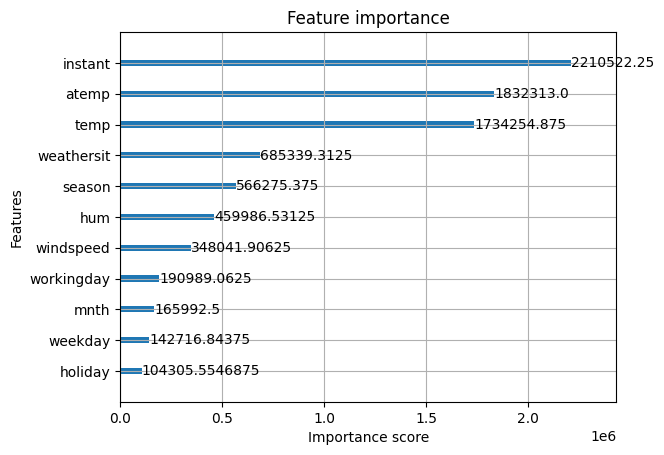

In [23]:
from xgboost import plot_importance
from matplotlib import pyplot

plot_importance(xg_reg, max_num_features=None, importance_type='gain')
pyplot.show()

In [24]:
lgbm_reg.feature_importances_

array([476,  68,   0,  79,   0, 116,  46,  44, 276, 170, 383, 397],
      dtype=int32)

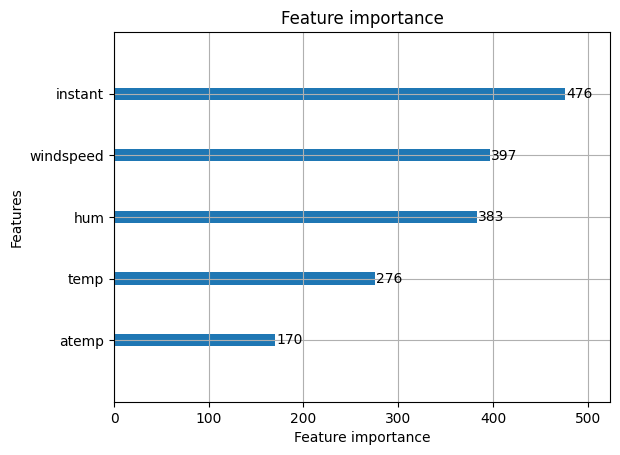

In [25]:
from lightgbm import plot_importance
from matplotlib import pyplot

plot_importance(lgbm_reg, max_num_features=5)
pyplot.show()

In [26]:
cat_reg.feature_importances_

array([23.0345018 ,  6.10245108, 16.50129931,  3.34018801,  0.3219835 ,
        1.89882291,  1.35577906,  4.55390389, 14.54732189, 13.80349609,
        9.00786838,  5.53238407])

In [27]:
sorted_idx = np.argsort(cat_reg.feature_importances_)
sorted_col = X_train.columns[sorted_idx]
sorted_imp = cat_reg.feature_importances_[sorted_idx]
feature_dict = dict(zip(sorted_col, sorted_imp))
imp_cat = list(feature_dict.items())[::-1]
print(imp_cat)

[('instant', np.float64(23.034501799004687)), ('yr', np.float64(16.501299312336737)), ('temp', np.float64(14.547321894454573)), ('atemp', np.float64(13.803496090654365)), ('hum', np.float64(9.007868384357097)), ('season', np.float64(6.102451075065804)), ('windspeed', np.float64(5.53238407405343)), ('weathersit', np.float64(4.55390389017246)), ('mnth', np.float64(3.3401880107221573)), ('weekday', np.float64(1.8988229050061762)), ('workingday', np.float64(1.3557790596354127)), ('holiday', np.float64(0.32198350453710733))]


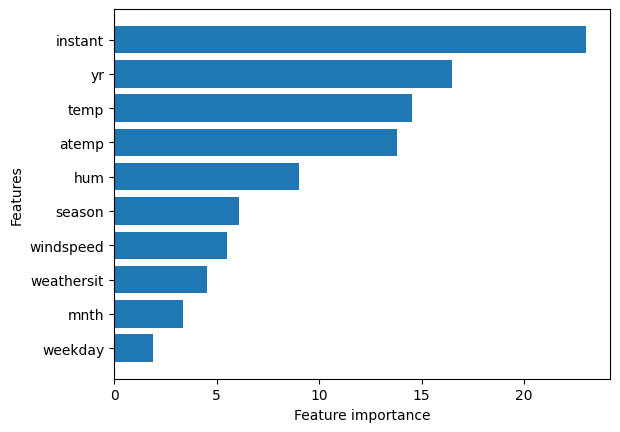

In [28]:
features = sorted_col[-10:]
feature_imp = sorted_imp[-10:]

import matplotlib.pyplot as plt

plt.barh(features, feature_imp)
plt.xlabel('Feature importance')
plt.ylabel('Features')
plt.show()

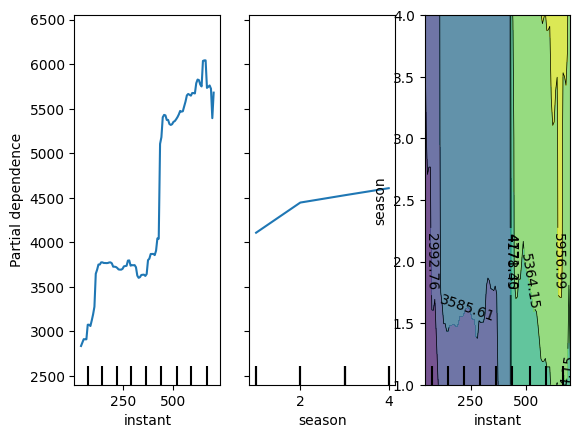

In [29]:
from sklearn.inspection import PartialDependenceDisplay
features = [0,1,(0,1)]
PartialDependenceDisplay.from_estimator(lgbm_reg, X_train, features)

In [30]:
import numpy as np

def partial_dependency(model, X, features, f_id):
    X_temp = X.copy()
    grid = np.linspace(np.percentile(X_temp.iloc[:, f_id], 0.1), np.percentile(X_temp.iloc[:, f_id], 99.5), 50)
    y_pred = np.zeros(len(grid))

    for i, val in enumerate(grid):
        X_temp.iloc[:, f_id] = val
        y_pred[i] = model.predict(X_temp.iloc[:, :features]).mean()

    return grid, y_pred

In [31]:
# 범주형 데이터를 위한 맞춤형 의존도 함수
import numpy as np

def c_partial_dependency(model, X, features, f_id):
    X_temp = X.copy()
    grid = np.unique(X_temp.iloc[:f_id])
    y_pred = np.zeros(len(grid))

    for i, val in enumerate(grid):
        X_temp.iloc[:, f_id] = val
        y_pred[i] = model.predict(X_temp.iloc[:, :features]).mean()

    return grid, y_pred


In [32]:
features = X_train.shape[1]

f_id = 3
grid, y_pred = partial_dependency(xg_reg, X_train, features, f_id=f_id)
print(grid)
print(y_pred)

[ 1.          1.2244898   1.44897959  1.67346939  1.89795918  2.12244898
  2.34693878  2.57142857  2.79591837  3.02040816  3.24489796  3.46938776
  3.69387755  3.91836735  4.14285714  4.36734694  4.59183673  4.81632653
  5.04081633  5.26530612  5.48979592  5.71428571  5.93877551  6.16326531
  6.3877551   6.6122449   6.83673469  7.06122449  7.28571429  7.51020408
  7.73469388  7.95918367  8.18367347  8.40816327  8.63265306  8.85714286
  9.08163265  9.30612245  9.53061224  9.75510204  9.97959184 10.20408163
 10.42857143 10.65306122 10.87755102 11.10204082 11.32653061 11.55102041
 11.7755102  12.        ]
[4538.87695312 4538.87695312 4538.87695312 4538.87695312 4538.87695312
 4555.17285156 4555.17285156 4555.17285156 4555.17285156 4560.05712891
 4560.05712891 4560.05712891 4560.05712891 4560.05712891 4480.14648438
 4480.14648438 4480.14648438 4480.14648438 4455.85546875 4455.85546875
 4455.85546875 4455.85546875 4455.85546875 4450.52294922 4450.52294922
 4450.52294922 4450.52294922 4450.3

In [33]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Scatter(x=grid, y=y_pred))
fig.show()

In [35]:
features = X_train.shape[1]
f_id = 3
grid, y_pred = partial_dependency(cat_reg, X_train, features, f_id = f_id)
print(grid)
print(y_pred)

[ 1.          1.2244898   1.44897959  1.67346939  1.89795918  2.12244898
  2.34693878  2.57142857  2.79591837  3.02040816  3.24489796  3.46938776
  3.69387755  3.91836735  4.14285714  4.36734694  4.59183673  4.81632653
  5.04081633  5.26530612  5.48979592  5.71428571  5.93877551  6.16326531
  6.3877551   6.6122449   6.83673469  7.06122449  7.28571429  7.51020408
  7.73469388  7.95918367  8.18367347  8.40816327  8.63265306  8.85714286
  9.08163265  9.30612245  9.53061224  9.75510204  9.97959184 10.20408163
 10.42857143 10.65306122 10.87755102 11.10204082 11.32653061 11.55102041
 11.7755102  12.        ]
[4450.29193157 4450.29193157 4450.29193157 4448.28259481 4448.28259481
 4448.28259481 4448.28259481 4478.62874773 4478.62874773 4478.62874773
 4478.62874773 4478.62874773 4445.13434228 4445.13434228 4445.13434228
 4445.13434228 4474.20863156 4474.20863156 4474.20863156 4474.20863156
 4474.20863156 4544.93670323 4544.93670323 4544.93670323 4544.93670323
 4537.86990927 4537.86990927 4537.8

In [36]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Scatter(x=grid, y=y_pred))
fig.show()

In [37]:
from sklearn.model_selection import cross_val_score
lin_reg = LinearRegression()
svl = SVR(kernel='linear')
svr = SVR(kernel='rbf')

scores_lin = cross_val_score(lin_reg, X, y, scoring='neg_mean_squared_error', cv=10)
scores_svl = cross_val_score(svl, X, y, scoring='neg_mean_squared_error', cv=10)
scores_svr = cross_val_score(svr, X, y, scoring='neg_mean_squared_error', cv=10)

rmse_lin = np.sqrt(-scores_lin)
rmse_svl = np.sqrt(-scores_svl)
rmse_svr = np.sqrt(-scores_svr)

print("Reg rmse:", np.round(rmse_lin, 2))
print("SVM_linear rmse:", np.round(rmse_svl, 2))
print("SVM_rbf rmse:", np.round(rmse_svr, 2))
print("RMSE_lin mean: %0.2f" % (rmse_lin.mean()))
print("RMSE_svl mean: %0.2f" % (rmse_svl.mean()))
print("RMSE_svr mean: %0.2f" % (rmse_svr.mean()))

Reg rmse: [ 504.01  840.55 1140.88  728.39  640.2   969.95 1133.45 1252.85 1084.64
 1425.33]
SVM_linear rmse: [2123.07 1334.43 1681.64 1120.72 2400.2  2297.68 1539.93 1400.4  1441.04
 3716.88]
SVM_rbf rmse: [3199.08 1651.46  601.76  977.28 1868.24 1558.25 1985.29 2427.38 2786.28
 1865.86]
RMSE_lin mean: 972.02
RMSE_svl mean: 1905.60
RMSE_svr mean: 1892.09


In [38]:
xg_reg = XGBRegressor()
lgbm_reg = LGBMRegressor()
cat_reg = CatBoostRegressor()

scores_xg = cross_val_score(xg_reg, X, y, scoring='neg_mean_squared_error', cv=10)
scores_lgb = cross_val_score(lgbm_reg, X, y, scoring='neg_mean_squared_error', cv=10)
scores_cat = cross_val_score(cat_reg, X, y, scoring='neg_mean_squared_error', cv=10)

rmse_xg = np.sqrt(-scores_xg)
rmse_lgb = np.sqrt(-scores_lgb)
rmse_cat = np.sqrt(-scores_cat)

print("XGB rmse:", np.round(rmse_xg, 2))
print("LGBM rmse:", np.round(rmse_lgb, 2))
print("Cat rmse:", np.round(rmse_cat, 2))

print("XGB_RMSE mean: %0.2f" % (rmse_xg.mean()))
print("LGBM_RMSE mean: %0.2f" % (rmse_lgb.mean()))
print("Cat_RMSE mean: %0.2f" % (rmse_cat.mean()))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1133
[LightGBM] [Info] Number of data points in the train set: 657, number of used features: 11
[LightGBM] [Info] Start training from score 4838.404871
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain